## 05 Model Evaluation

#### Import relevant libraries

In [8]:
pip install -U scikit-learn scipy matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 20.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 MB 19.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 11.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 KB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 19.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.9/930.9 KB 16.8 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.1
    Uninstalling matplotlib-3.2.1:
      Successfully uninstalled matplotlib-3.2.1
Note: you may need to restart the kernel to use updated packages.


In [22]:
import os
from joblib import dump, load
import numpy as np
import pandas as pd

#### Load model_fit file

In [2]:
input_dir = os.path.join('..', 'data', 'processed')
lin_model = load(os.path.join(input_dir, 'lin_model_2.pkl'))

In [3]:
print(lin_model)

LinearRegression()


#### Load in test and train datasets from model training step

In [8]:
X_train = np.load(os.path.join(input_dir, 'X_train.npy'))
X_test = np.load(os.path.join(input_dir, 'X_test.npy'))
y_train = np.load(os.path.join(input_dir, 'Y_train.npy'))
y_test = np.load(os.path.join(input_dir, 'y_test.npy'))

In [14]:
# Predict on the test data 
y_pred_lin = lin_model.predict(X_test)

In [25]:
lin_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lin})
lin_df

,Actual,Predicted
0,-0.011143,0.017332
1,0.035763,0.000749
2,0.005074,0.004527
3,0.013494,0.007075
4,0.006932,0.011190
5,0.023854,0.020851
6,0.023928,0.013931
7,0.021072,0.012101
8,0.004868,0.015350
9,0.002663,0.004696


#### Compute fit statistics

(a) Bias := $\sum (\hat{y_i} - y_i) $

(b) Mean Absolute Error := $\frac{1}{n} \sum |\hat{y_i} - y_i|$

In [11]:
# Import mean_absolute_error, mean_squared_error from sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [18]:
# Compare MAE of the models
mae_lin = mean_absolute_error(y_test, y_pred_lin)
print("MAE of Linear Regression: {}".format(mae_lin))
# rmse_forest = np.sqrt(mean_squared_error(y_test, y_pred_forest))
# print("RMSE of Random Forest: {}".format(rmse_forest))

MAE of Linear Regression: 0.014649815852365763


(c) Mean Square Error := $\frac{1}{n} \sum (\hat{y_i} - y_i)^2$

In [19]:
# Compare RMSE of the models
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
print("RMSE of Linear Regression: {}".format(rmse_lin))
# rmse_forest = np.sqrt(mean_squared_error(y_test, y_pred_forest))
# print("RMSE of Random Forest: {}".format(rmse_forest))

RMSE of Linear Regression: 0.018707422606678542


(d) R squared := $1 - \frac{RSS}{TSS}$ := $1- \frac{\sum (\hat{y_i}-y_i)^2}{\sum (y_i - \mu)^2}$

In [10]:
# Compare R^2 of the models
print("R^2 of Linear Regression: {}".format(lin_model.score(X_test, y_test)))
# print("R^2 of Random Forest: {}".format(reg_forest.score(X_test, y_test)))

R^2 of Linear Regression: -0.03445705421152834


#### Partial dependence plots

In [26]:
import matplotlib.pyplot as plt

ValueError: x and y must be the same size

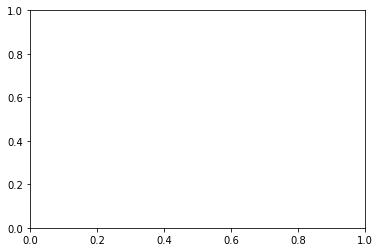

In [35]:
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test,y_pred_lin, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [36]:
X_test

array([[-0.12167091,  0.03425728, -0.46347593],
       [-0.37182311, -0.49096128, -0.46347593],
       [-0.02814728, -0.14785136, -0.46347593],
       [-0.19200573, -0.22481458, -0.46347593],
       [ 0.33496566,  0.26786651, -0.46347593],
       [-0.16685894,  0.06913453, -0.46347593],
       [-0.17501011, -0.07503532, -0.46347593],
       [ 0.25030352,  0.2279852 , -0.25162233],
       [-0.17153832,  0.03969957,  1.76768688],
       [-0.01177919, -0.13173164, -0.46347593],
       [-0.0223822 , -0.12415562, -0.46347593],
       [-0.13820243, -0.17959387, -0.46347593],
       [-0.28575305, -0.40980539, -0.46347593],
       [-0.16494757,  0.04051892, -0.46347593],
       [-0.20940609, -0.02971203, -0.42589374],
       [-0.15965426, -0.16073739,  1.26396701],
       [-0.19034997, -0.06809987, -0.36666225],
       [ 0.09213747, -0.04225714, -0.46347593],
       [ 0.08122651, -0.02061288, -0.46347593],
       [-0.16322496, -0.30083079, -0.46347593],
       [ 0.17848791,  0.02309858, -0.463

In [37]:
y_test

array([-0.01114266,  0.03576302,  0.00507351,  0.0134936 ,  0.00693174,
        0.02385409,  0.0239278 ,  0.02107181,  0.00486842,  0.00266337,
        0.04562736,  0.01884121,  0.00042494,  0.01120106,  0.04971815,
        0.00213938, -0.00567732, -0.01771883,  0.01886048,  0.01571375,
        0.01082631, -0.01100319,  0.03164391, -0.02604012])

In [40]:
X_train

array([[-1.69343978e-01, -2.85904218e-01, -4.63475933e-01],
       [-1.65996428e-01,  7.70121467e-02,  1.01029646e-01],
       [-1.25618730e-01,  1.36569105e-01,  3.00769415e+00],
       [-1.71265601e-01, -9.29178827e-02, -4.63475933e-01],
       [-1.75166842e-01, -2.02234202e-02, -4.63475933e-01],
       [-1.05908755e-01, -8.59298673e-02,  7.86098343e-01],
       [-1.96211100e-01, -2.07845584e-01, -4.63475933e-01],
       [ 7.81646796e-02, -7.98710364e-02, -4.63475933e-01],
       [-7.46122390e-02,  1.18423447e-01,  5.10623080e-01],
       [-2.09839160e-01, -1.14563238e-01,  2.92552324e+00],
       [-8.75980084e-02, -2.27431175e-01, -4.63475933e-01],
       [-2.33651703e-01, -1.83200197e-01, -2.34530350e-01],
       [-1.35986504e-01, -2.73726798e-01, -4.63475933e-01],
       [-1.62354638e-01, -1.58976405e-02,  1.44639959e+00],
       [-7.86826631e-03,  6.69743259e-02,  1.21451586e-01],
       [-2.96710912e-01, -4.11631119e-01, -4.63475933e-01],
       [-1.06257082e-01, -5.83262862e-02

In [41]:
y_train

array([-0.03416866,  0.00282226,  0.00802667,  0.01898949, -0.00115089,
       -0.00585645,  0.01926142, -0.08323259,  0.00918286,  0.01056196,
       -0.01120898, -0.01284825, -0.02440359, -0.01753855,  0.00261526,
        0.00320057,  0.01324831,  0.00280169, -0.00445395,  0.00914361,
        0.11471146,  0.00261659,  0.0114677 ,  0.03150316, -0.00277388,
       -0.01451882,  0.01932547,  0.0224298 ,  0.02713702,  0.02838264,
        0.0107673 ,  0.00445981, -0.02658048,  0.01361626,  0.02789873,
        0.01315932,  0.01372656, -0.05660601,  0.00716223,  0.00461677,
        0.01296707,  0.046154  , -0.00410798, -0.02142341,  0.0296849 ,
        0.01556336,  0.02034431,  0.01317397, -0.00013197,  0.01073645,
        0.02640134, -0.00601328,  0.02094803, -0.00445634,  0.02572893,
        0.0352473 ,  0.0078961 , -0.02029348,  0.00393277,  0.01477046,
        0.02947542,  0.00091622,  0.03081215,  0.0007616 , -0.00621125,
        0.06792122, -0.00112131,  0.00657209,  0.0392824 ,  0.01